In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import matplotlib.patches as mpatches
#for Dunns's test
import scikit_posthocs as sp
#global matplotlib font config
SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size = MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize = SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize = MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize = MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize = MEDIUM_SIZE)  # fontsize of the figure title

# Statistical Analysis of Virtual Patients

In this section, we provide some statistical analysis assocauted with the two virtual cohorts. Recall that we consider two virtual parameter set from a wider and narrower range:

                        test1--[0.25*base,1.5*base]
                        test2--[0.7*base,1.3*base]

In [2]:
df_test1 = pd.read_csv("meta_data/test1/vp_responses_test1.csv")
df_test1.head()

,r1,r2,K1,l,dC,muC,s,gammaC,k,wC,K2,dB,muB,b,gammaB,wB,response
0,0.195883,0.235442,4672.0914,2.132794,0.527942,0.879902,0.240032,0.036762,9.803925e-08,0.000037,1927.66780,0.158904,1.320229,0.000688,0.009307,0.000005,NR
1,0.153420,0.265688,5266.2662,1.981673,0.565351,0.259125,0.115093,0.023180,8.138430e-08,0.000028,458.36955,0.178566,0.323741,0.001158,0.008324,0.000005,NR
2,0.185626,0.197194,1570.2328,2.237475,0.556463,0.348765,0.121863,0.027620,2.748923e-07,0.000030,445.59584,0.284413,1.267551,0.000797,0.006415,0.000004,NR
3,0.178245,0.165988,7380.8189,0.858624,0.447894,0.330779,0.279377,0.019636,1.284742e-07,0.000041,493.46840,0.266264,1.207519,0.000930,0.002689,0.000003,R
4,0.216034,0.219573,3801.8847,1.520416,0.297227,0.266267,0.112311,0.040188,7.052503e-08,0.000013,977.37167,0.200965,0.607919,0.000615,0.002132,0.000002,PR


In [3]:
df_test2 = pd.read_csv("meta_data/test2/vp_responses_test2.csv")
df_test2.head()

,r1,r2,K1,l,dC,muC,s,gammaC,k,wC,K2,dB,muB,b,gammaB,wB,response
0,0.195883,0.235442,4672.0914,1.854581,0.368948,0.589876,0.313106,0.027064,2.012576e-07,0.000026,2045.2733,0.280629,0.725376,0.001285,0.008317,0.000003,NR
1,0.153420,0.265688,5266.2662,1.939821,0.371382,0.524018,0.284381,0.021441,1.945303e-07,0.000025,1630.0306,0.315767,0.883536,0.001092,0.007765,0.000003,NR
2,0.185626,0.197194,1570.2328,1.210860,0.507131,0.770840,0.284777,0.037459,2.479862e-07,0.000038,1440.3081,0.370993,1.056056,0.001533,0.006149,0.000004,R
3,0.178245,0.165988,7380.8189,1.946920,0.411023,0.449228,0.253080,0.021287,1.823998e-07,0.000029,2049.6657,0.234715,1.016566,0.001430,0.006353,0.000003,NR
4,0.216034,0.219573,3801.8847,1.683888,0.425307,0.574081,0.303883,0.037030,1.761702e-07,0.000036,1399.6195,0.239453,0.816196,0.001067,0.006924,0.000003,NR


In [4]:
print(df_test1.shape)
print(df_test2.shape)

(13999, 17)
(13999, 17)


In [5]:
df1_R = df_test1[df_test1['response']=='R']
df1_PR = df_test1[df_test1['response']=='PR']
df1_NR = df_test1[df_test1['response']=='NR']

df2_R = df_test2[df_test2['response']=='R']
df2_PR = df_test2[df_test2['response']=='PR']
df2_NR = df_test2[df_test2['response']=='NR']

Check the percentage of each category

In [6]:
print("==============test1-wide-range==================")
print(df_test1['response'].value_counts(normalize=True))

print("==============test2-narrow-range==================")
print(df_test2['response'].value_counts(normalize=True))

==============test1-wide-range==================
response
NR    0.537896
R     0.235303
PR    0.226802
Name: proportion, dtype: float64
==============test2-narrow-range==================
response
NR    0.417744
PR    0.327881
R     0.254375
Name: proportion, dtype: float64


## Kruskal-Wallis Test For Response Analysis

- The Kruskal-Wallis test is a non-parametric test that's used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable. Being non-parametric means it doesn't make any assumptions about the underlying distributions being normal.
- The eta squared estimate assumes values from 0 to 1, this is taken as a percentage of variance in dependent variable explained by the independent variable. One way to interpret those values would be Cohen's guideline; eta values are 0.01-0.06–> small effect, o.o6-0.14—> moderate effect and lastly >=0.14 large effect.
-  The Dunn's test is used after a Kruskal-Wallis test to determine which groups differ. Here is an implementation. For example, if we consider the variable $r$, the test reveals that there's a highly significant difference between R-NR, R-NR but not PR-NR.

-test_df is one the test data above.

In [7]:
def get_kw_dunn_test_results(test_df):
    # Kruskal-Wallis combined with Dunn's test
    # Register important results here
    kw_results = []
    dunns_results = []
    significant_params = []
    params = test_df.columns[:-1]
    df_R = test_df[test_df['response']=='R']
    df_PR = test_df[test_df['response']=='PR']
    df_NR = test_df[test_df['response']=='NR']

    # Loop over the parameter space
    for param in params:
        x1 = df_R[param].values
        x2 = df_PR[param].values
        x3 = df_NR[param].values

        # Kruskal-Wallis test
        H, p = stats.kruskal(x1, x2, x3)

        # Effect size (eta squared)
        N = len(x1) + len(x2) + len(x3)
        k = 3  # Number of groups
        eta_sq = (H - (k - 1)) / (N - 1)


        #only consider significant ones for Dunn's test.
        alpha = 0.05
        if p <= alpha:
            significant_params.append(param)

            #Dunn's test, append p-values for pairs after Dunn's test
            posthoc = sp.posthoc_dunn([x1, x2, x3], p_adjust='holm')
            for i, group1 in enumerate(['R', 'PR', 'NR']):
                for j, group2 in enumerate(['R', 'PR', 'NR']):
                    if j <= i:
                        continue
                    dunns_results.append({
                        'Parameter': param,
                        'Comparison': f'{group1} vs. {group2}',
                        'P-value': posthoc.iloc[i, j],
                        'Significance': 'Significant' if posthoc.iloc[i, j] <= alpha else 'Not Significant'
                    })

        # Kruskal-Wallis results
        result = {
            'Parameter': param,
            'H_statistic': H,
            'p_value': p,
            'eta_sq': eta_sq,
            'Significance' : 'Significant' if p <= alpha else 'Not Significant'
        }
        kw_results.append(result)

    
    kw_results_df = pd.DataFrame(kw_results)
    dunns_results_df = pd.DataFrame(dunns_results)
    
    return kw_results_df,dunns_results_df




In [8]:
kw_results_test1_df,dunns_results_test1_df = get_kw_dunn_test_results(test_df=df_test1)
#kw_results_test1_df.to_csv("meta_data/test1/kw_results_test1.csv",index=False)

kw_results_test2_df,dunns_results_test2_df = get_kw_dunn_test_results(test_df=df_test2)
#kw_results_test2_df.to_csv("meta_data/test2/kw_results_test2.csv",index=False)

In [9]:
kw_results_test1_df.sort_values(by='eta_sq',ascending=False)

,Parameter,H_statistic,p_value,eta_sq,Significance
11,dB,4679.652043,0.000000e+00,0.334166,Significant
3,l,4605.811450,0.000000e+00,0.328891,Significant
1,r2,483.473582,1.035251e-105,0.034396,Significant
6,s,74.965673,5.265153e-17,0.005213,Significant
5,muC,62.204811,3.107399e-14,0.004301,Significant
4,dC,55.698479,8.039500e-13,0.003836,Significant
0,r1,22.612425,1.229630e-05,0.001473,Significant
8,k,14.686812,6.468435e-04,0.000906,Significant
13,b,8.878251,1.180626e-02,0.000491,Significant
10,K2,8.026595,1.807370e-02,0.000431,Significant


In [10]:
dunns_results_test1_df

,Parameter,Comparison,P-value,Significance
0,r1,R vs. PR,1.861755e-03,Significant
1,r1,R vs. NR,7.629780e-06,Significant
2,r1,PR vs. NR,4.512200e-01,Not Significant
3,r2,R vs. PR,2.900539e-35,Significant
4,r2,R vs. NR,1.268670e-106,Significant
5,r2,PR vs. NR,1.527400e-12,Significant
6,l,R vs. PR,2.104993e-02,Significant
7,l,R vs. NR,0.000000e+00,Significant
8,l,PR vs. NR,0.000000e+00,Significant
9,dC,R vs. PR,8.601812e-01,Not Significant


In [11]:
dunns_results_test1_df[dunns_results_test1_df['Comparison']=='R vs. NR'].sort_values(by='P-value',ascending=True)
# dunns_results_test1_df.to_csv("meta_data/test1/dunns_results_test1.csv",index=False)

,Parameter,Comparison,P-value,Significance
7,l,R vs. NR,0.000000e+00,Significant
25,dB,R vs. NR,0.000000e+00,Significant
4,r2,R vs. NR,1.268670e-106,Significant
16,s,R vs. NR,4.935633e-14,Significant
13,muC,R vs. NR,2.493808e-13,Significant
10,dC,R vs. NR,5.302362e-09,Significant
1,r1,R vs. NR,7.629780e-06,Significant
19,k,R vs. NR,1.404464e-02,Significant
28,b,R vs. NR,3.751976e-02,Significant
22,K2,R vs. NR,2.501530e-01,Not Significant


In [12]:
dunns_results_test2_df[dunns_results_test2_df['Comparison']=='R vs. NR'].sort_values(by='P-value',ascending=True)
# dunns_results_test2_df.to_csv("meta_data/test2/dunns_results_test2.csv",index=False)

,Parameter,Comparison,P-value,Significance
7,l,R vs. NR,0.000000e+00,Significant
22,dB,R vs. NR,0.000000e+00,Significant
4,r2,R vs. NR,5.162181e-193,Significant
16,s,R vs. NR,9.709683e-12,Significant
13,muC,R vs. NR,8.196977e-09,Significant
10,dC,R vs. NR,2.302301e-08,Significant
1,r1,R vs. NR,6.444035e-07,Significant
19,k,R vs. NR,6.154363e-03,Significant


## ECDF Plots

In this section, we display *Empirical Cumulative Distribution Function* associated with each parameter.The idea is to plot the distribution of the data as a cumulative percentage. This is useful for identifying differences in the location and spread of the data between groups, say response vs not

In [13]:
#Empirical cumulative distribution function (ECDF) plots
def GetECDF(param_name,test_df):
    """
    ECDF plots show the distribution of the data as a cumulative percentage. This can be useful 
    for identifying differences in the location and spread of the data between groups, say response vs not
    """
    
    df_R = test_df[test_df['response']=='R']
    df_PR = test_df[test_df['response']=='PR']
    df_NR = test_df[test_df['response']=='NR']
    # Generate two sets of random data
    data1 = df_R[param_name].values
    data2 = df_PR[param_name].values
    data3 = df_NR[param_name].values

    # Calculate the ECDFs for each data set
    ecdf1 = sm.distributions.ECDF(data1)
    ecdf2 = sm.distributions.ECDF(data2)
    ecdf3 = sm.distributions.ECDF(data3)
    
    return ecdf1,ecdf2,ecdf3


In [14]:
def plot_ecdf(test_df, params, labels_latex,test_num=1,save_fig=False):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True)  
    axes = ax.ravel() 

    for i, param in enumerate(params):
        ecdf1, ecdf2, ecdf3 = GetECDF(param,test_df)
        axes[i].step(ecdf1.x, ecdf1.y, label='R', color='g', linewidth=3)
        axes[i].step(ecdf2.x, ecdf2.y, label='PR', color='b', linewidth=3)
        axes[i].step(ecdf3.x, ecdf3.y, label='NR', color='r', linewidth=3)

        if i > 1:
            axes[i].set_xlabel('parameter values',fontsize=20)

        if i == 0 or i == 2:
            axes[i].set_ylabel('cumulative probability',fontsize=20)

        axes[i].legend(title=labels_latex[i], loc='upper left', fontsize=20)
        # axes[i].set_rasterized(True)

    if save_fig:
        plt.tight_layout()    
        plt.subplots_adjust(bottom=0.07,top=1,wspace=0.05)
        plt.savefig(f'figures/4ecd_plots_test{test_num}.jpg',format='jpg', dpi=300,bbox_inches='tight')

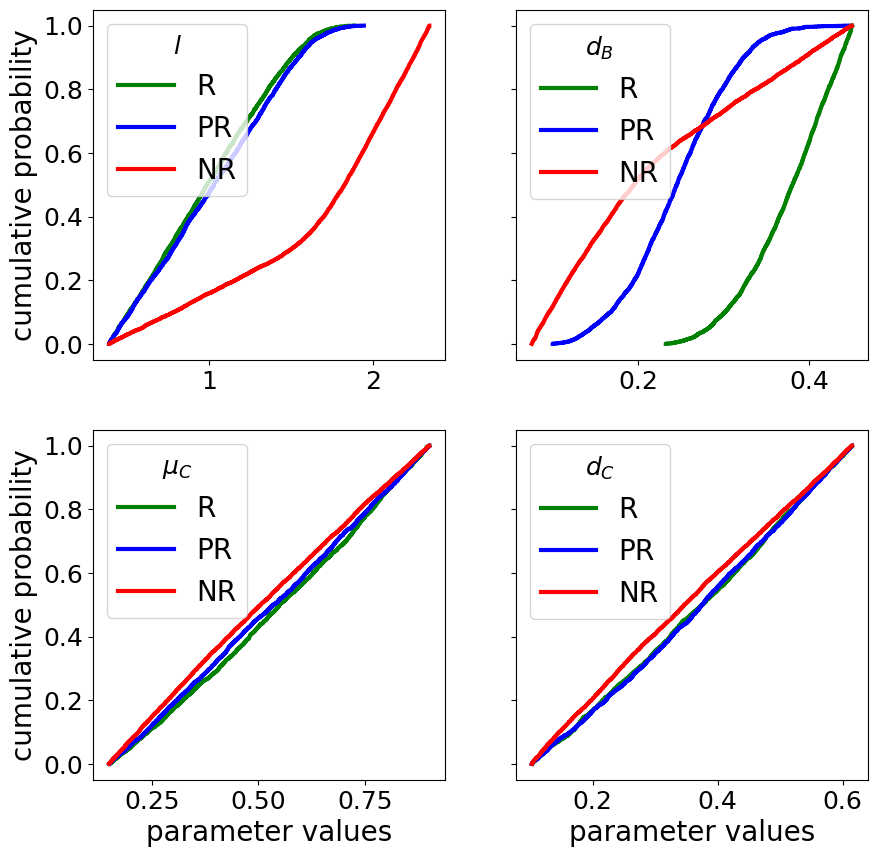

In [15]:
params = ['l','dB','muC','dC']
labels_latex = ['$l$', '$d_B$', '$\mu_C$', '$d_C$']
plot_ecdf(test_df=df_test1, params=params, 
          labels_latex=labels_latex,
          test_num=1,save_fig=False)

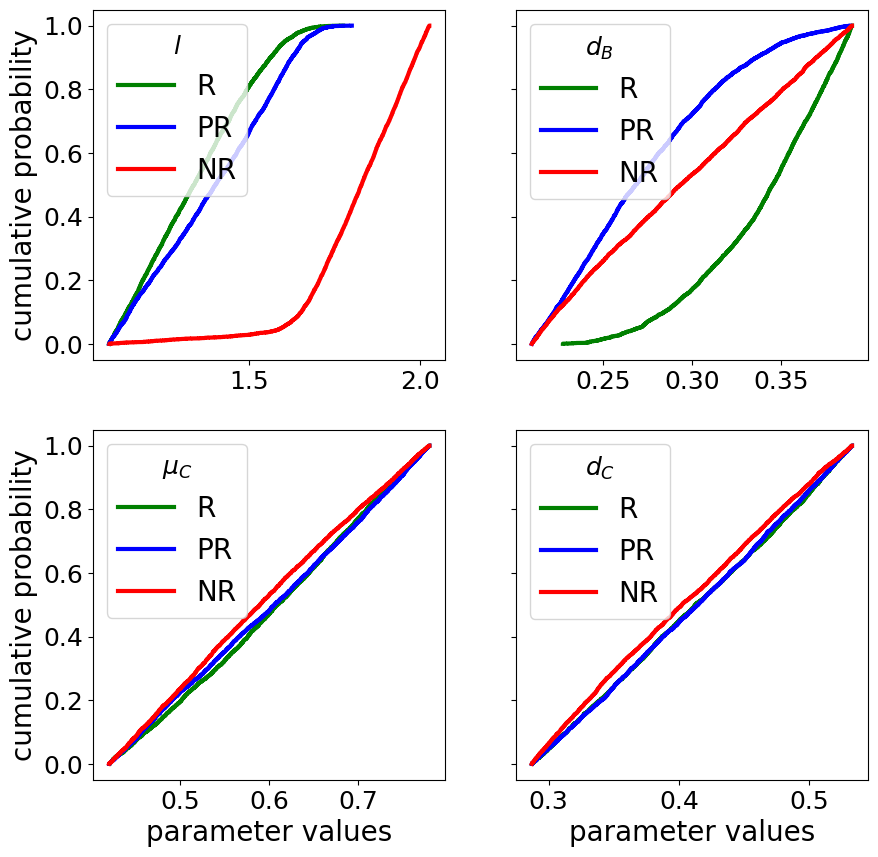

In [16]:
params = ['l','dB','muC','dC']
labels_latex = ['$l$', '$d_B$', '$\mu_C$', '$d_C$']
plot_ecdf(test_df=df_test2, params=params, 
          labels_latex=labels_latex,
          test_num=2,save_fig=False)

## Box Plots

In [17]:
cols = df_test1.columns
params = cols[:-1]
col_dict_test1 = {}
col_dict_test2 = {}
for param in params:
    x_test1 = [[]]*3
    x_test1[0] = df1_R[param].values
    x_test1[1] = df1_PR[param].values
    x_test1[2] = df1_NR[param].values
    col_dict_test1[param] = x_test1
    
    x_test2 = [[]]*3
    x_test2[0] = df2_R[param].values
    x_test2[1] = df2_PR[param].values
    x_test2[2] = df2_NR[param].values
    col_dict_test2[param] = x_test2

In [18]:
def plot_box(col_dict,parameter,symbol,test_num=1,save_fig=False):
    xvars = ["R","PR","NR"]
    fig,ax = plt.subplots(1,3,figsize=(10,5),sharey=True)
    for i in range(3):
            ax[i].set_xlabel(xvars[i])
            #ax[i].set_yticks([])
            sns.boxplot(y=col_dict[parameter][i],ax=ax[i],color='orange')
            ax[i].set_ylabel('')
            if i==0:
                ax[i].set_ylabel(symbol)
            ax[i].set_rasterized(True)


    if save_fig:
        plt.tight_layout()  
        plt.subplots_adjust(bottom=0.07,top=1,wspace=0.05)
        plt.savefig(f'figures/box_{parameter}_test{test_num}.jpg',format='jpg', dpi=300,bbox_inches='tight',pad_inches=0)

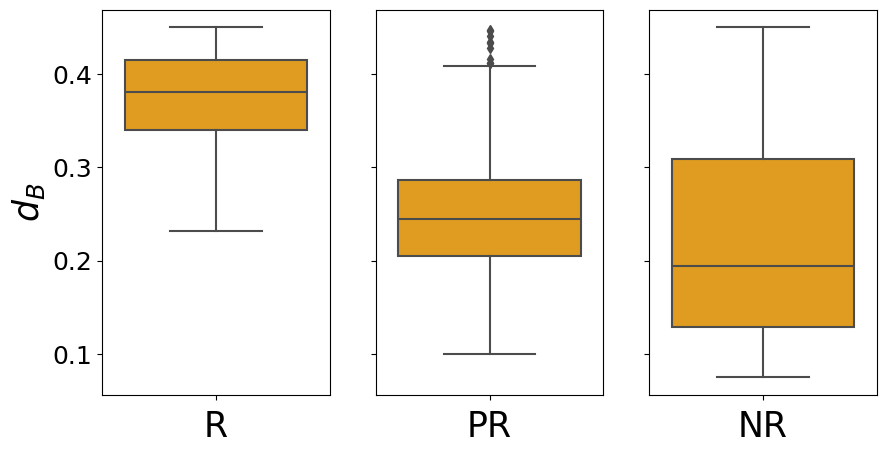

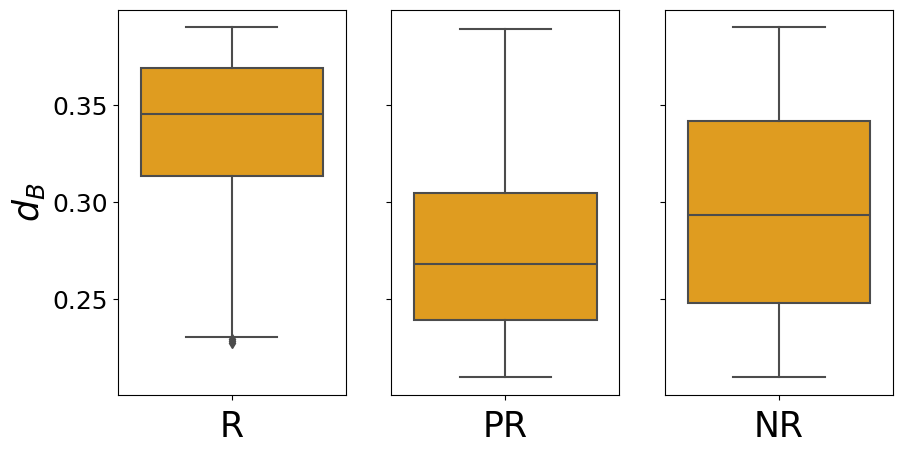

In [19]:
plot_box(col_dict=col_dict_test1,parameter='dB',symbol='$d_B$')
plot_box(col_dict=col_dict_test2,parameter='dB',test_num=1,symbol='$d_B$')

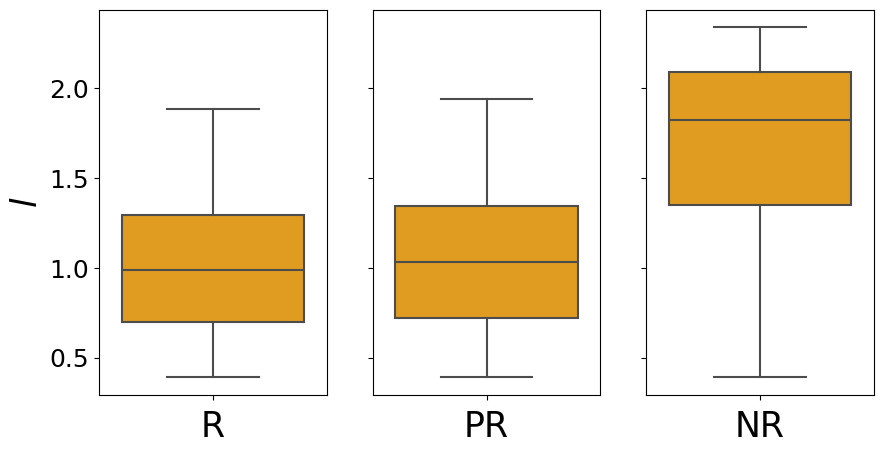

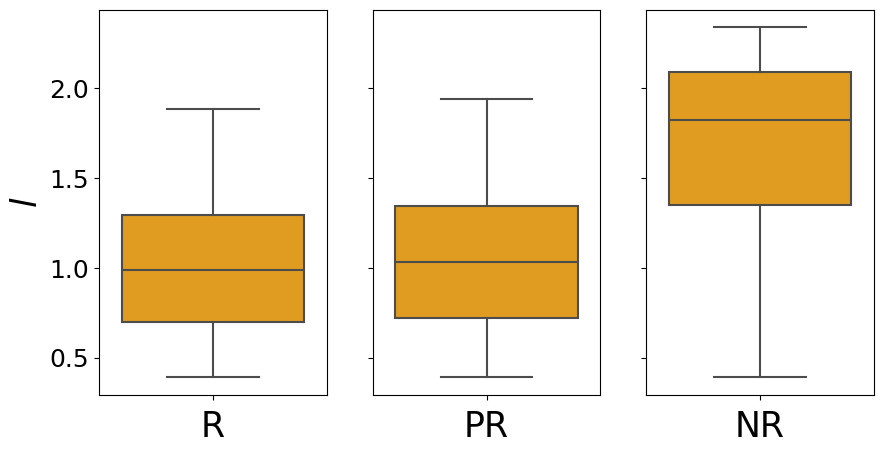

In [20]:
plot_box(col_dict=col_dict_test1,parameter='l',symbol='$l$')
plot_box(col_dict=col_dict_test1,parameter='l',symbol='$l$',test_num=1)

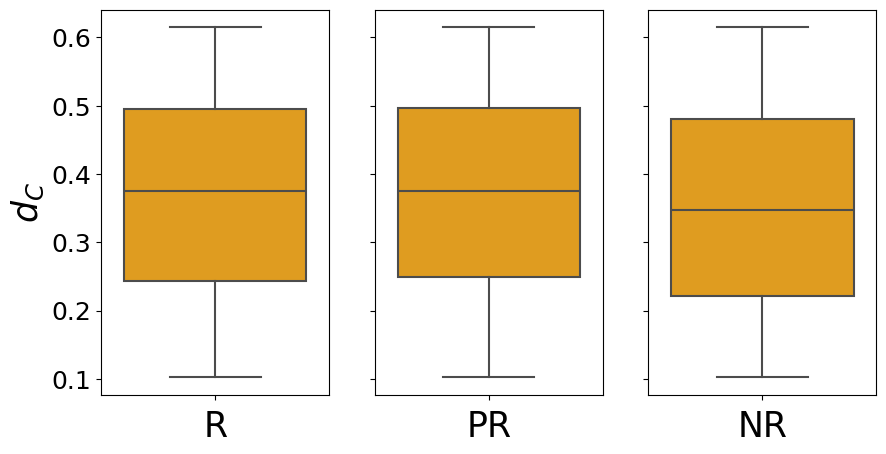

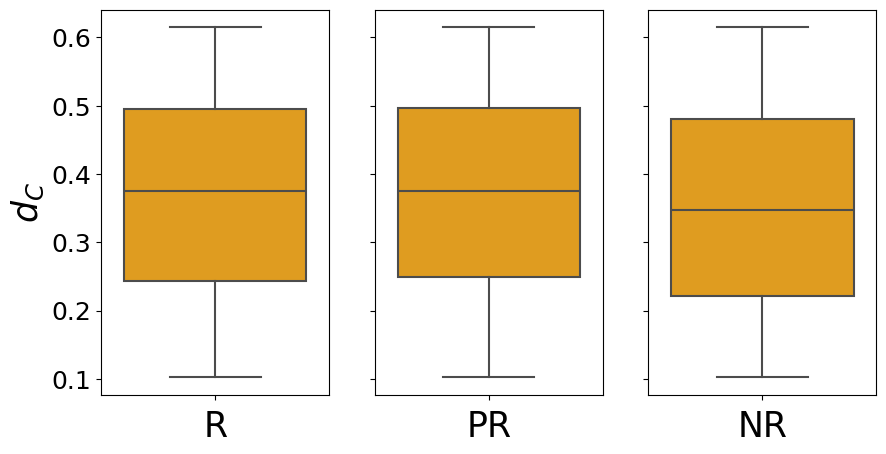

In [21]:
plot_box(col_dict=col_dict_test1,parameter='dC',symbol='$d_C$')
plot_box(col_dict=col_dict_test1,parameter='dC',symbol='$d_C$',test_num=1)

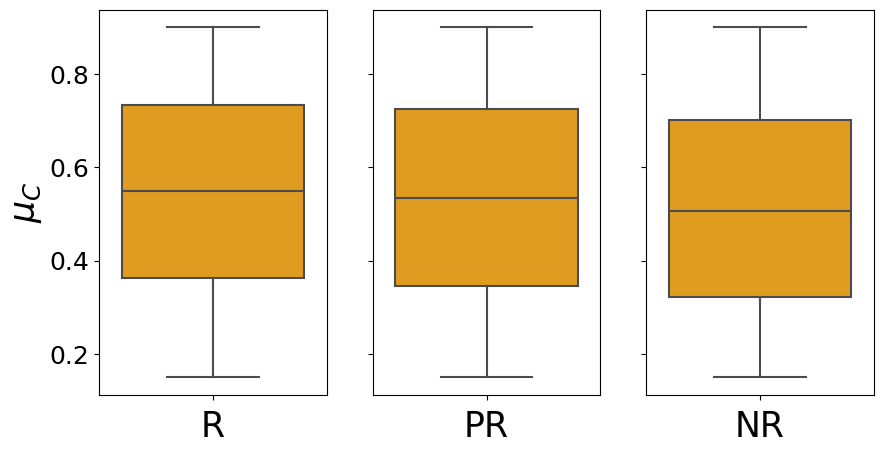

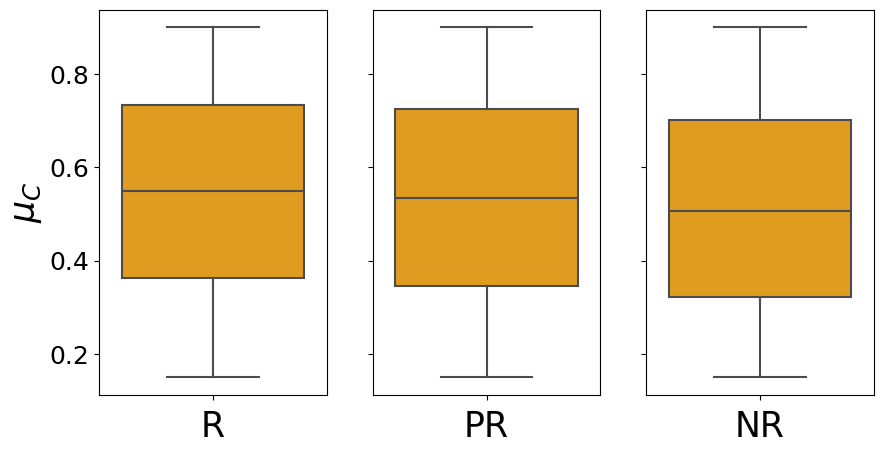

In [22]:
plot_box(col_dict=col_dict_test1,parameter='muC',symbol='$\mu_C$')
plot_box(col_dict=col_dict_test1,parameter='muC',symbol='$\mu_C$',test_num=1)

## dB vs response

- Does increasing $d_B$ lead to better treatment outcome?

In [23]:
db_boost_test1 = pd.read_csv("meta_data/test1/dB_boosts_test1.csv")
db_boost_test1.head()

,boost,R,PR,NR
0,base,0.234945,0.229516,0.535538
1,10%,0.281234,0.211801,0.506965
2,20%,0.362097,0.178656,0.459247
3,30%,0.459819,0.131652,0.408529
4,40%,0.552325,0.078363,0.369312


In [24]:
db_boost_test2 = pd.read_csv("meta_data/test2/dB_boosts_test2.csv")
db_boost_test2.head()

,boost,R,PR,NR
0,base,0.254732,0.332881,0.412387
1,10%,0.343382,0.260947,0.395671
2,20%,0.488249,0.123223,0.388528
3,30%,0.596900,0.011215,0.391885
4,40%,0.600900,0.000071,0.399029


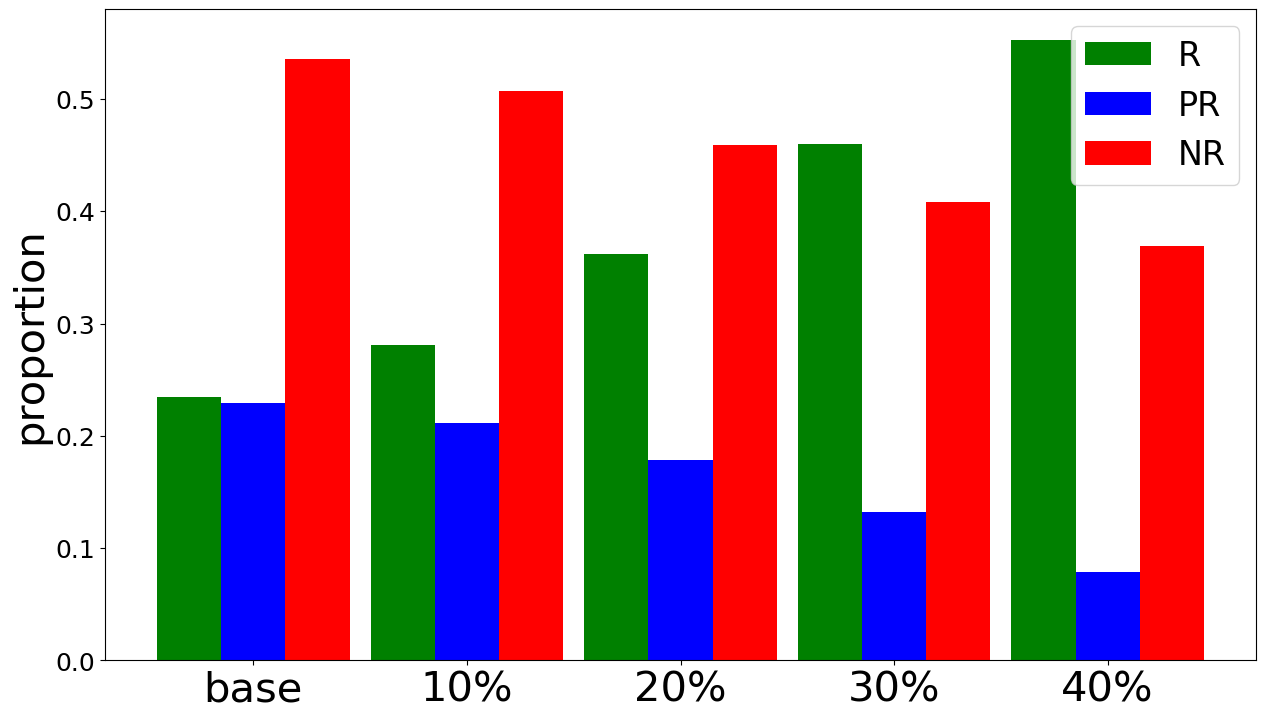

In [25]:
#test-1
bar_width = 0.3
r_pos = np.arange(len(db_boost_test1['boost']))
pr_pos = [x + bar_width for x in r_pos]
nr_pos = [x + bar_width*2 for x in r_pos]

# Create a grouped bar chart, nice colors side by side (:
fig, ax = plt.subplots(figsize=(13,7))
ax.bar(r_pos, db_boost_test1['R'], width=bar_width, label='R',color='green')
ax.bar(pr_pos, db_boost_test1['PR'], width=bar_width, label='PR',color='blue')
ax.bar(nr_pos, db_boost_test1['NR'], width=bar_width, label='NR',color='red')
ax.set_rasterized(True)

ax.set_xticks(pr_pos)
ax.set_xticklabels(db_boost_test1['boost'],fontsize=30)

plt.ylabel('proportion',fontsize=30)
plt.legend(fontsize=24)
        
plt.tight_layout()  
plt.subplots_adjust(bottom=0.07,top=1,wspace=0.05)
plt.savefig('figures/dB_bar_test1.jpg',format='jpg', dpi=300,bbox_inches='tight')  

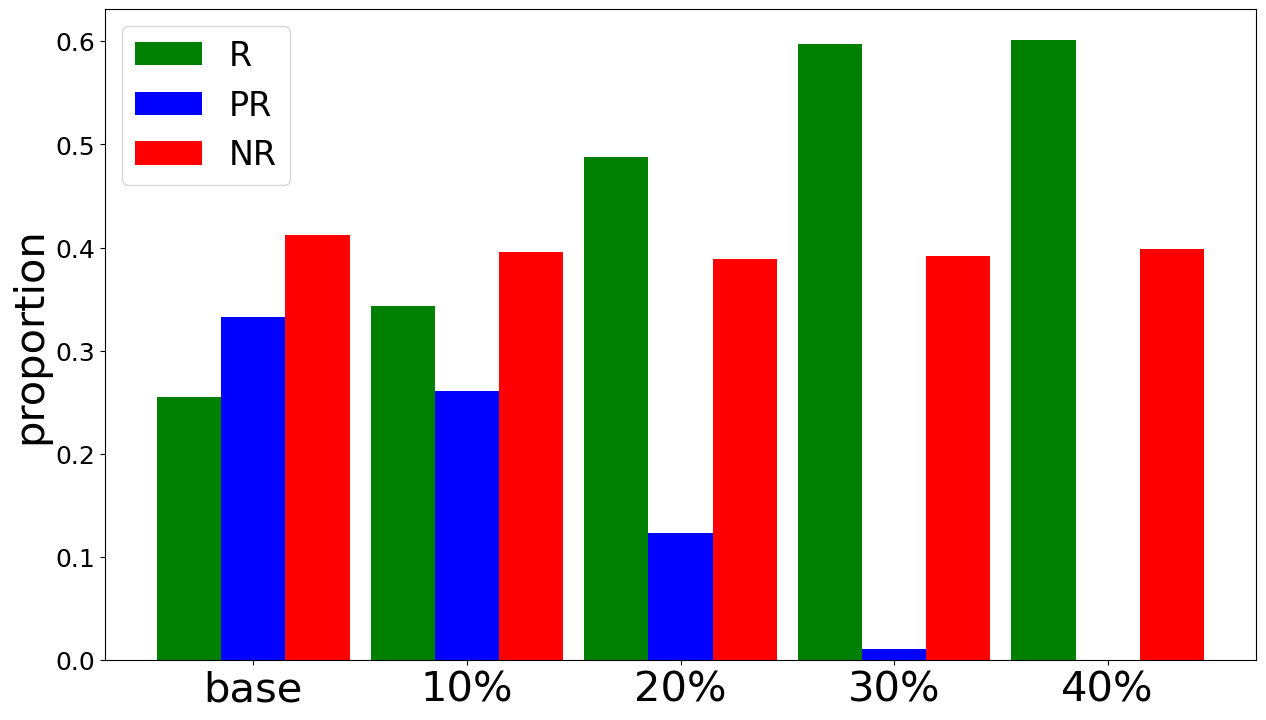

In [26]:
#test-1
bar_width = 0.3
r_pos = np.arange(len(db_boost_test2['boost']))
pr_pos = [x + bar_width for x in r_pos]
nr_pos = [x + bar_width*2 for x in r_pos]

# Create a grouped bar chart, nice colors side by side (:
fig, ax = plt.subplots(figsize=(13,7))
ax.bar(r_pos, db_boost_test2['R'], width=bar_width, label='R',color='green')
ax.bar(pr_pos, db_boost_test2['PR'], width=bar_width, label='PR',color='blue')
ax.bar(nr_pos, db_boost_test2['NR'], width=bar_width, label='NR',color='red')
ax.set_rasterized(True)

ax.set_xticks(pr_pos)
ax.set_xticklabels(db_boost_test2['boost'],fontsize=30)

plt.ylabel('proportion',fontsize=30)
plt.legend(fontsize=24)
        
plt.tight_layout()  
plt.subplots_adjust(bottom=0.07,top=1,wspace=0.05)
plt.savefig('figures/dB_bar_test2.jpg',format='jpg', dpi=300,bbox_inches='tight')  

# Plot Trajectories Groups

Mean trajectories of four cell populations $T_{pos}, T_{neg}, C $ and $B$ within corresponding response groups are illustrated in this section. This csv data is pretty large since it includes all ~ 7000 VPs with full trajectories. What we mean is for each parameter set, we solve and register the full trajectories associated with ODE variables. We then average each trajectory to inspect how a representative trajectory looks like. 

In [27]:
df = pd.read_csv("meta_data/test1/vp_responses_test1_all_vars.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10796,10797,10798,10799,10800,10801,10802,10803,10804,10805
0,NR,3533.5152,37.5,37.572739,37.645617,37.718635,37.791794,37.865092,37.938531,38.012111,...,-0.037054,-0.037204,-0.037354,-0.037504,-0.037654,-0.037804,-0.037954,-0.038104,-0.038254,-0.038404
1,NR,4033.2629,37.5,37.557020,37.614130,37.671330,37.728610,37.785980,37.843440,37.900980,...,-0.046744,-0.046931,-0.047118,-0.047306,-0.047493,-0.047680,-0.047868,-0.048056,-0.048243,-0.048431
2,NR,1323.4888,37.5,37.567450,37.635020,37.702700,37.770510,37.838430,37.906460,37.974620,...,0.053372,0.053329,0.053287,0.053245,0.053203,0.053161,0.053119,0.053076,0.053034,0.052992
3,R,1.6990,37.5,37.564300,37.628700,37.693200,37.757800,37.822600,37.887400,37.952400,...,400.023100,400.035700,400.048300,400.060900,400.073400,400.086000,400.098500,400.111000,400.123600,400.136100
4,PR,37.3214,37.5,37.579900,37.660100,37.740400,37.820800,37.901400,37.982200,38.063200,...,720.490400,720.560500,720.630600,720.700600,720.770600,720.840500,720.910400,720.980200,721.049900,721.119600


In [28]:
df_R = df[df[0]=='R'].iloc[:,2:]
df_PR = df[df[0]=='PR'].iloc[:,2:]
df_NR = df[df[0]=='NR'].iloc[:,2:]

def split_dataframe(df):
    blocks = {}
    labels = ["Ts", "Tr", "C", "B"]
    num_cols = 2701  # Number of columns in each block
    
    for i, label in enumerate(labels):
        start_col = i * num_cols
        end_col = (i + 1) * num_cols
        blocks[label] = df.iloc[:, start_col:end_col]
    
    return blocks

# Create a dictionary to organize the DataFrames
df_dict = {
    "df_R": split_dataframe(df_R),
    "df_PR": split_dataframe(df_PR),
    "df_NR": split_dataframe(df_NR)
}

In [29]:
# responder
blocks_R = df_dict['df_R']
Ts_R = blocks_R['Ts'].mean()
Tr_R = blocks_R['Tr'].mean()
C_R = blocks_R['C'].mean()
B_R = blocks_R['B'].mean()

# non-responder
blocks_NR = df_dict['df_NR']
Ts_NR = blocks_NR['Ts'].mean()
Tr_NR = blocks_NR['Tr'].mean()
C_NR = blocks_NR['C'].mean()
B_NR = blocks_NR['B'].mean()

# partial-responder
blocks_PR = df_dict['df_PR']
Ts_PR = blocks_PR['Ts'].mean()
Tr_PR = blocks_PR['Tr'].mean()
C_PR = blocks_PR['C'].mean()
B_PR = blocks_PR['B'].mean()

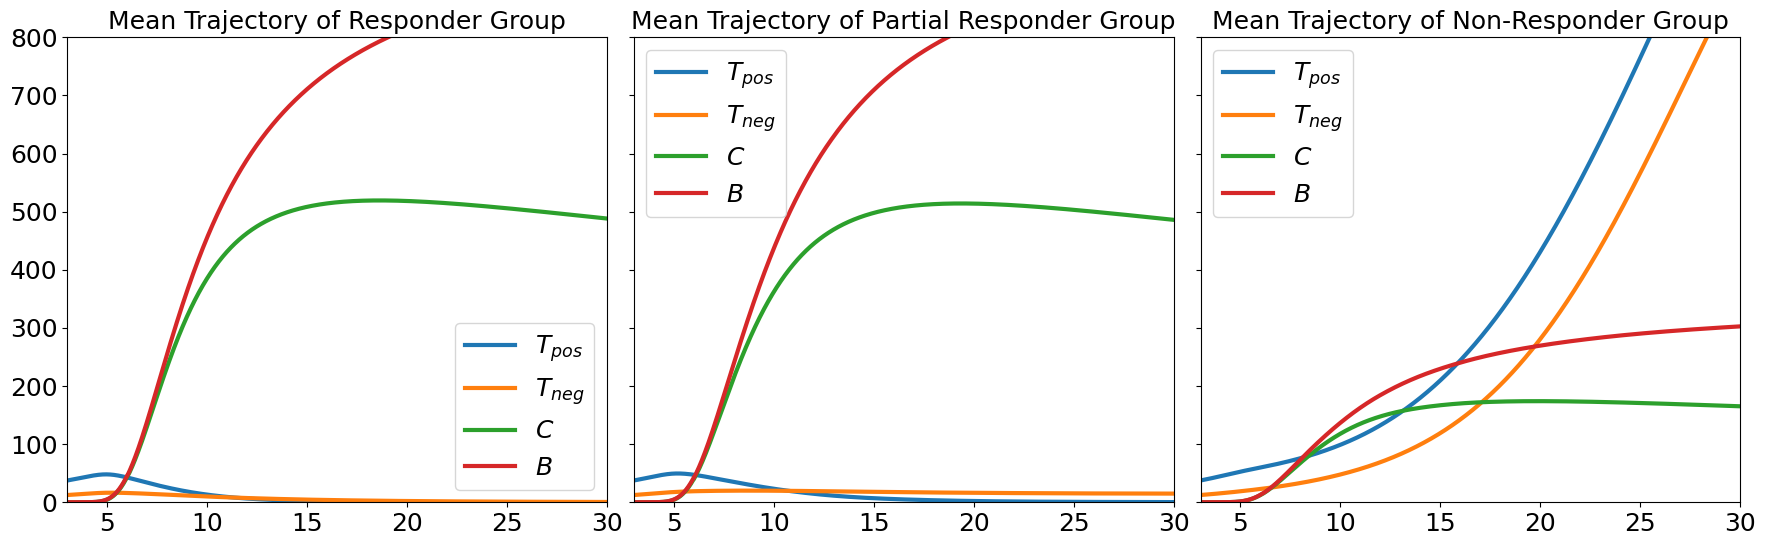

In [30]:
T = Ts_R.shape[0]
tspan = np.linspace(3,30,T)
fig, ax = plt.subplots(1, 3, figsize=(18, 5),sharey=True)
#responder
ax[0].plot(tspan, Ts_R,  linewidth=3)  
ax[0].plot(tspan, Tr_R,  linewidth=3)
ax[0].plot(tspan, C_R, linewidth=3) 
ax[0].plot(tspan, B_R, linewidth=3) 
ax[0].set_title('Mean Trajectory of Responder Group',fontsize=18)
ax[0].legend(['$T_{pos}$','$T_{neg}$','$C$','$B$'])
ax[0].set_xlim([3,30])
ax[0].set_ylim([0,600])

#partial responder
ax[1].plot(tspan,Ts_PR,linewidth=3)
ax[1].plot(tspan,Tr_PR,linewidth=3)
ax[1].plot(tspan,C_PR,linewidth=3)
ax[1].plot(tspan,B_PR,linewidth=3)
ax[1].set_title('Mean Trajectory of Partial Responder Group',fontsize=18)
ax[1].legend(['$T_{pos}$','$T_{neg}$','$C$','$B$'])
ax[1].set_xlim([3,30])
ax[1].set_ylim([0,600])

#non-responder
ax[2].plot(tspan,Ts_NR,linewidth=3)
ax[2].plot(tspan,Tr_NR,linewidth=3)
ax[2].plot(tspan,C_NR,linewidth=3)
ax[2].plot(tspan,B_NR,linewidth=3)
ax[2].set_title('Mean Trajectory of Non-Responder Group',fontsize=18)
ax[2].legend(['$T_{pos}$','$T_{neg}$','$C$','$B$'])
ax[2].set_xlim([3,30])
ax[2].set_ylim([0,800])

plt.tight_layout()    
plt.subplots_adjust(bottom=0.07,top=1,wspace=0.05)
# plt.savefig(f'figures/group_trajectory.jpg',format='jpg', dpi=300,bbox_inches='tight')

plt.show()

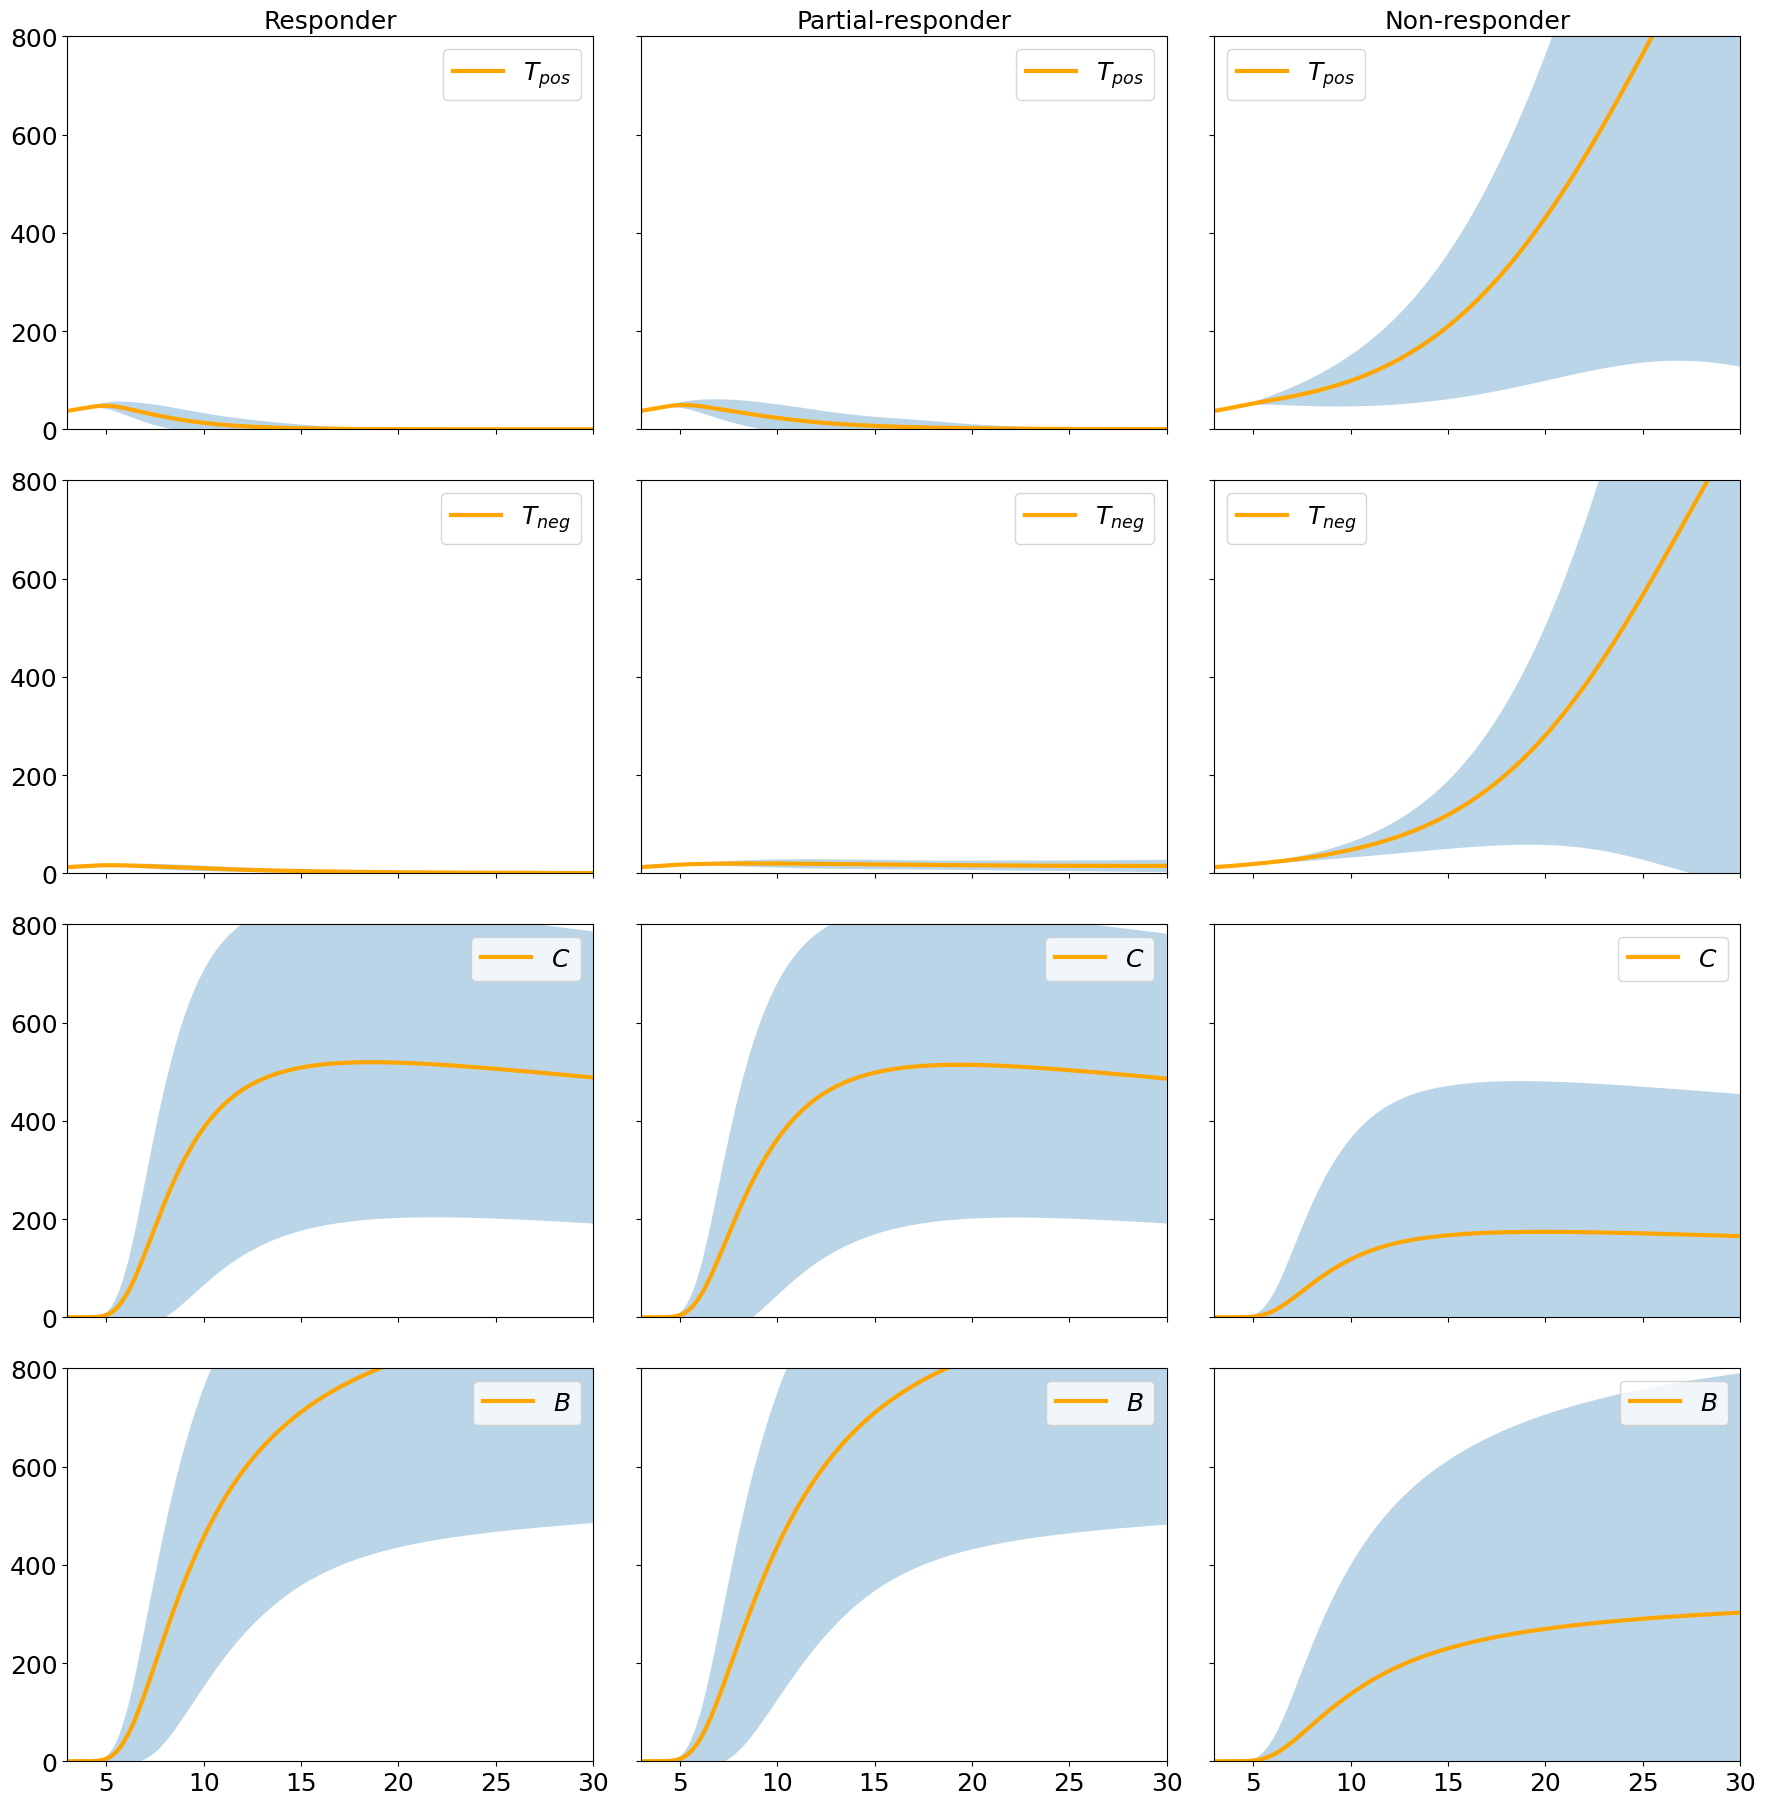

In [31]:
#calculate mean and standard deviation for each block
def calculate_stats(blocks):
    stats = {}
    for label, block in blocks.items():
        mean_val = block.mean(axis=0)
        std_val = block.std(axis=0)
        stats[label] = (mean_val, std_val)
    return stats

# Calculate stats for each category
stats_R = calculate_stats(df_dict['df_R'])
stats_PR = calculate_stats(df_dict['df_PR'])
stats_NR = calculate_stats(df_dict['df_NR'])
# Prepare the tspan for plotting
T = len(stats_R['Ts'][0])
tspan = np.linspace(3, 30, T)

#mean trajectory with standard deviation bands, ugly but whatever
def plot_trajectory(ax, tspan, mean_val, std_val, label):
    ax.plot(tspan, mean_val, linewidth=3, label=f'${label}$',color='orange')
    ax.fill_between(tspan, mean_val - std_val, mean_val + std_val, alpha=0.3)
    ax.legend(fontsize=18)

fig, axes = plt.subplots(4, 3, figsize=(18, 20), sharex=True, sharey=True)


groups = [('Responder', stats_R), ('Partial-responder', stats_PR),('Non-responder', stats_NR),]
variables = {'Ts': 'T_{pos}', 'Tr': 'T_{neg}', 'C': 'C', 'B': 'B'}

for i, (group_name, stats) in enumerate(groups):
     for j, (variable, latex_label) in enumerate(variables.items()):
        mean_val, std_val = stats[variable]
        ax = axes[j, i]
        plot_trajectory(ax, tspan, mean_val, std_val, latex_label)
        if j == 0:
            ax.set_title(group_name, fontsize=18)
        # if i == 0:
        #     ax.set_ylabel(variable, fontsize=16)
        ax.set_xlim([3, 30])
        ax.set_ylim([0, 800])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig(f'figures/group_trajectory_std.jpg',format='jpg', dpi=300,bbox_inches='tight')

plt.show()


# Scatter Plot sp vs cart

This section investigates how the treatment outcome changes for varying CAR-T amount vs positive target antigen rate.

In [32]:
df = pd.read_csv("meta_data/cart_sp_response.csv")
df.columns = ["cart_dose","antigen_positive","response","tumor_final"]
df.head()

,cart_dose,antigen_positive,response,tumor_final
0,0.01,0.11012,NR,68.2270
1,0.01,0.12024,NR,3653.3917
2,0.01,0.13036,NR,3649.3661
3,0.01,0.14048,NR,3644.0174
4,0.01,0.15060,NR,3638.2166


In [33]:
df["response"].value_counts()

response
NR    3451
R      798
Name: count, dtype: int64

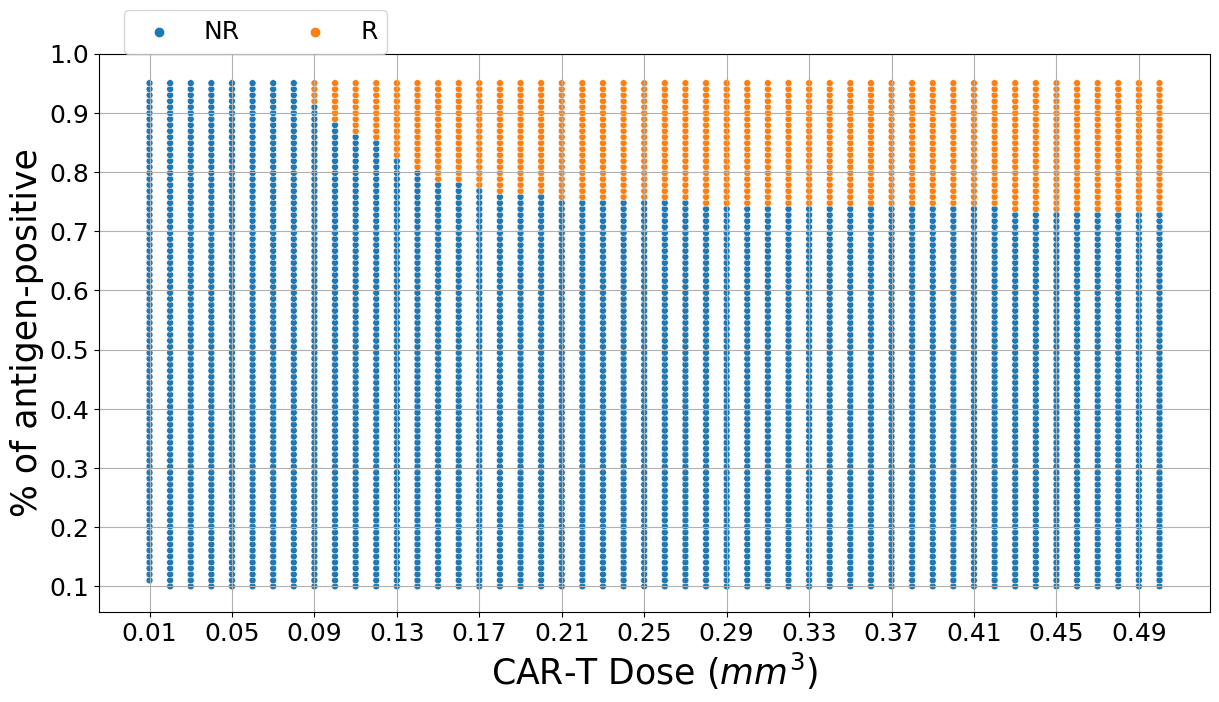

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=df["cart_dose"], y=df["antigen_positive"], hue=df["response"], s=25, ax=ax)
ax.set_xlabel(r"CAR-T Dose ($mm^3$)")
ax.set_xticks(np.arange(0.01, 0.51, 0.04))
ax.set_yticks(np.arange(0.1, 1.1, 0.1))
ax.set_ylabel("% of antigen-positive")
ax.set_rasterized(True)
ax.legend(bbox_to_anchor=(0.141, 1.101), loc="upper center", ncol=3, fancybox=True)
ax.grid('on')


plt.tight_layout(pad=0)
plt.subplots_adjust(bottom=0.07,top=1,wspace=0.05)
# plt.savefig('figures/scatter_sp_cart.png',format='png', dpi=300,bbox_inches='tight')

plt.show()

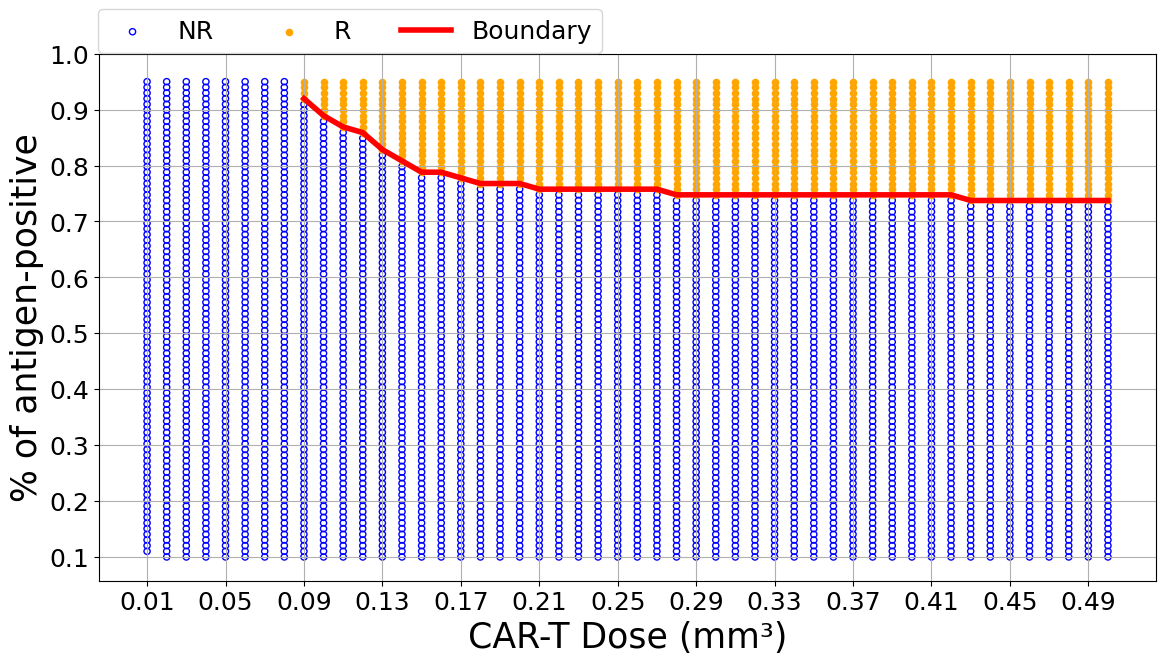

In [35]:
# get the right ordering
df_high_antigen = df[df['antigen_positive'] > 0.7]
df_high_antigen_sorted = df_high_antigen.sort_values(by=['cart_dose', 'antigen_positive'])
boundary_points = []

#Loop over each unique cart_dose value
for dose in df_high_antigen_sorted['cart_dose'].unique():
    df_subset = df_high_antigen_sorted[df_high_antigen_sorted['cart_dose'] == dose]
    # Find the index where we switch from NR to R
    switch_index = df_subset['response'].eq('R').idxmax()
    if df_subset.loc[switch_index, 'response'] == 'R':
        boundary_points.append((dose, df_subset.loc[switch_index, 'antigen_positive']))
boundary_df = pd.DataFrame(boundary_points, columns=['cart_dose', 'antigen_positive'])

plt.figure(figsize=(12, 7))

# Plot 'NR' as filled circles (use a smaller size to reduce clutter)
plt.scatter(df[df['response'] == 'NR']['cart_dose'], df[df['response'] == 'NR']['antigen_positive'],
            marker='o', facecolors='none', edgecolors='blue', s=20, label='NR')

# Plot 'R' as filled circles
plt.scatter(df[df['response'] == 'R']['cart_dose'], df[df['response'] == 'R']['antigen_positive'],
            marker='o', color='orange', s=20, label='R')

# Plot the boundary curve
plt.plot(boundary_df['cart_dose'], boundary_df['antigen_positive'],
         color='red', lw=4, linestyle='-', label='Boundary')

plt.xlabel(r"CAR-T Dose (mm³)")
plt.ylabel("% of antigen-positive")
plt.xticks(np.arange(0.01, 0.51, 0.04))
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.grid(True)
plt.legend(bbox_to_anchor=(0.237, 1.108), loc="upper center", ncol=3, fancybox=True)
plt.tight_layout()
#plt.savefig('figures/scatter_sp_cart.jpg',format='jpg', dpi=300,bbox_inches='tight')
plt.show()

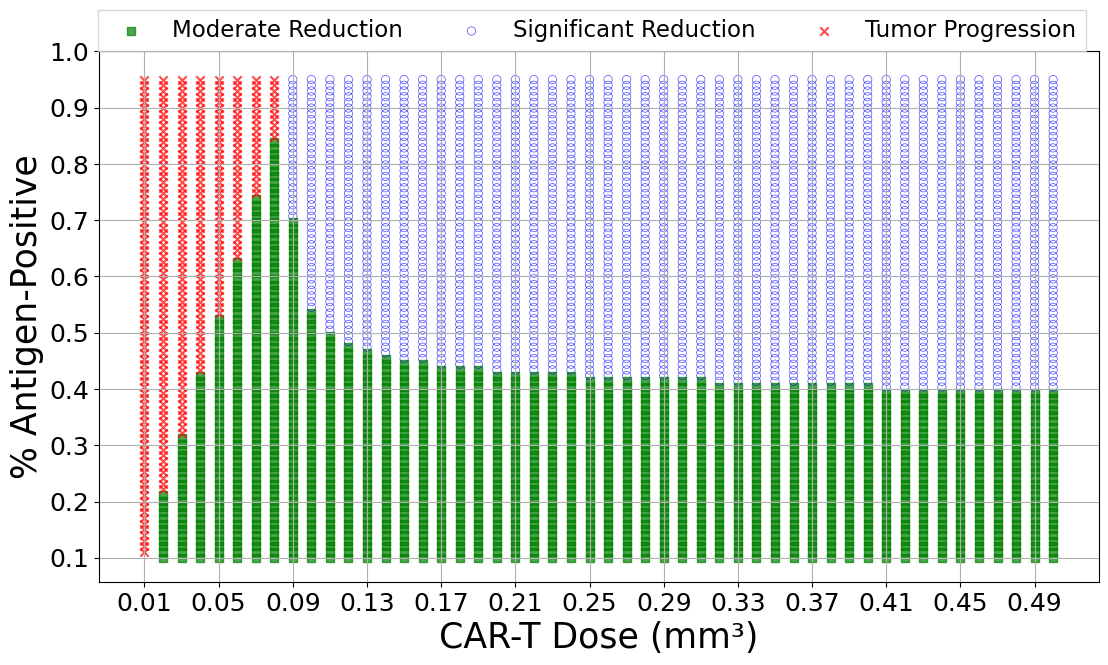

In [36]:
# Set the initial tumor volume
initial_volume = 50  # mm³

# Calculate the order of magnitude change
df['order_change'] = np.log10(df['tumor_final'] / initial_volume)

# Adjust the conditions to merge 'Stable/Slight Change' into 'Progression'
conditions = [
    (df['order_change'] <= -1),
    (df['order_change'] > -1) & (df['order_change'] <= 0),
    (df['order_change'] > 0)
]

# Adjusted group names, removing 'Stable/Slight Change'
choices = ['Significant Reduction', 'Moderate Reduction', 'Tumor Progression']
df['response_group'] = np.select(conditions, choices)

# Plotting with the updated groups
plt.figure(figsize=(12, 7))

# Define markers and colors for the adjusted groups
markers = {
    'Significant Reduction': 'o',
    'Moderate Reduction': 's',
    'Tumor Progression': 'x'
}
colors = {
    'Significant Reduction': 'blue',
    'Moderate Reduction': 'green',
    'Tumor Progression': 'red'
}

for group, df_group in df.groupby('response_group'):
    if group == 'Significant Reduction':
        # Special handling for 'Significant Reduction' to make markers empty blue circles
        plt.scatter(df_group['cart_dose'], df_group['antigen_positive'], 
                    marker=markers[group], facecolors='none', edgecolors='blue', 
                    label=group, alpha=0.7,linewidths=0.5)
    else:
        # For other groups, use filled markers with predefined colors
        plt.scatter(df_group['cart_dose'], df_group['antigen_positive'], 
                    marker=markers[group], color=colors[group], 
                    label=group, alpha=0.7)


        
    
plt.xlabel('CAR-T Dose (mm³)')
plt.ylabel('% Antigen-Positive')

plt.xticks(np.arange(0.01, 0.51, 0.04))
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.grid(True)
plt.legend(bbox_to_anchor=(-0.012, 1.10), loc='upper left', ncol=3, fancybox=False,fontsize=16.5)
plt.grid(True)
plt.tight_layout()
#plt.savefig('figures/scatter_sp_reduction.jpg',format='jpg', dpi=300,bbox_inches='tight')
plt.show()
